# 同花顺行业概念信息

In [19]:
import os
import pandas as pd
# https://zhuanlan.zhihu.com/p/508035138/
fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xlsx'.replace('\\',os.path.sep)
print(f'cwd:{os.getcwd()},\nfpath:{fpath}')

thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')


cwd:/Users/Johnson/Documents/Quant/pyQuant3/stock/jupyterAlgo/Quant2023,
fpath:../../JohnsonUtil/wencai/同花顺板块行业.xlsx


## 查询信息

In [20]:
thsgn[:1]
thsgn.columns
thsgn.loc['300474.SZ']

股票简称                                                                  景嘉微
现价(元)                                                                71.1
涨跌幅(%)                                                               0.08
主营产品名称                  图形显控领域产品||小型专用化雷达领域产品||小型专业化雷达||图形显控模块产品||加固类产...
所属概念                    华为欧拉;国家大基金持股;MCU芯片;信创;军工信息化;芯片概念;先进封装;东数西算(算力)...
所属同花顺行业                                                   国防军工-军工电子-军工电子Ⅲ
所属概念数量(个)                                                              16
a股流通市值 (元)2025.06.11                                   28899409734.900002
经营范围                    电子产品（不含电子出版物）、计算机软件的研究、开发、生产和销售及其相关的技术服务，集成电路设...
公司网站                                                 www.jingjiamicro.com
Name: 300474.SZ, dtype: object

# Debug开启

In [21]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

nb not handlers
nb: <ipykernel.iostream.OutStream object at 0x11156c790>


# TDX多日数据分析

## 定义 TDX-Path

In [22]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [23]:
sys.path.append("../../")
import os

import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

os.environ['NUMEXPR_MAX_THREADS'] = '12'

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [24]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [25]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df


def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):

    columns_ = [
        "name", "category", "close", "percent",'volra', 'topR', "lastp1d", "ma5dcum",
        "ma20d", "fib", "fibl", "ra", "ral", "df2", "per1d", "hmax", "lmin",
        "per%sd" % (market_value),
        "perc%sd" % (market_value)]
    if isinstance(df, pd.Series):
        columns_ = [co for co in columns_ if co in df.index]
    else:
        columns_ = [co for co in columns_ if co in df.columns]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            # print("Count:1")
            temp = df.loc[columns_]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    # for i in top5.keys():
    #     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    #     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    #     print(i, (topSort[i]))

    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df


def get_ths_info(code):
    code = cct.code_to_symbol_ths(code)
    return thsgn.loc[code]

### 还原Cell输出信息

In [26]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [9]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_d_60_y_all', '/low_w_200_y_all']


(4332, 197)

code
300344    15.4
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
600705     0.5
300344    22.4
Name: ratio, dtype: float64

### test InStock

In [10]:
df.columns

Index(['lopen', 'lhigh', 'llow', 'lastp', 'lvol', 'lamount', 'ma5d', 'ma10d',
       'ma20d', 'truer',
       ...
       'lowvol', 'last6vol', 'bandwidth', 'bollpect', 'category', 'timel',
       'close', 'name', 'ratio', 'percent'],
      dtype='object', length=197)

## 个股数据查看

In [11]:
df.ma203d[:1]
# df.loc['003042'].loc[["category", "close"]]

code
999999    3256.33
Name: ma203d, dtype: float64

In [12]:
show_tdx_data(df.loc['003042'])
get_ths_info('003042')

name                  中农联合
category    新股与次新股 ;核准制次新股
close                 16.0
percent               -0.8
topR                     1
lastp1d              16.13
ma5dcum               15.7
ma20d                15.32
fib                      0
fibl                     9
ra                     0.0
ral                   11.0
df2                     16
per1d                  0.2
hmax                 17.73
lmin                 12.78
per3d                  0.0
perc3d                 1.4
Name: 003042, dtype: object

股票简称                                                                 中农联合
现价(元)                                                               20.42
涨跌幅(%)                                                               2.67
主营产品名称                  吡虫啉||啶虫脒||烯啶虫胺||哒螨灵||低毒农药原药及其中间体||杀虫剂||杀菌剂||除草...
所属概念                                                  草甘膦;乡村振兴;中俄贸易概念;供销社
所属同花顺行业                                                      基础化工-化学制品-农药
经营范围                    生物、化学农药、化工产品及仪器仪表的技术开发、技术转让、技术咨询服务；农药（不含化学危险品）...
公司网站                                                       www.sdznlh.com
所属概念数量(个)                                                               4
a股流通市值 (元)2023.12.21                                           1390841800
Name: 003042.SZ, dtype: object

In [13]:
# df[(df.close > df.ma20d * 0.99) & (df.close < df.ma20d * 1.05)]

def filter_ma_range_df(df, ma='20', days='3'):
    dd = []
    for da in range(int(days), 0, -1):
        # print(da, ma)
        # df1 = df[ (df['lastp%sd'%(da)] > df['ma%s%sd'%(ma,da)]) & (df['lastp%sd'%(days)] < df['ma%s%sd'%(ma,da)] * 1.1)]
        df1 = df[(df['lastp%sd' % (da)] > df['ma%s%sd' % (ma, da)] * 0.99)]
        if da == days:
            dd = df1.index.tolist()
        else:
            dd = [x for x in dd if x in df1.index]

    return [x for x in set(dd)]


def get_union_list(maind, subd):
    # 筛选Main存在后切在新Sub出现
    return [x for x in maind if x in subd]

### 新农联合筛选

In [14]:
code_fs = '003042'
# show_tdx_data(df.loc['003042'])
# get_ths_info('003042')

df_f_t = df[(df.fib < 30) & (df.fibl > 6) & (df.df2 > 2) & (df.ral < -15) &
            (df.close >= df.ma5dcum) & (df.perc3d > 1.1) & (df.lastv1d > df.lastv2d) & (df.close > df.ma5d) ]

df_f_t.shape
# df_f_t.loc[code_fs][:1]
show_tdx_data(df_f_t)[:5]


(0, 197)

Count:0 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,


#### 写入069

In [15]:
# write_code_to_blk(df_f_t.index, '069')

In [16]:
df_ma26d = filter_ma_range_df(df, ma=20, days=5)
# 连续3日在生命线上
# df_ma26d = df[(df.fibl > 1) & (df.ra > 5)]
len(df_ma26d)
df_ma5d = filter_ma_range_df(df, ma=5, days=5)

# 连续3日在生命线上
len(df_ma5d)
df_x = get_union_list(df_ma26d, df_ma5d)
df_5dx_20d = get_union_list(df_x, df[df.ma5d < df.ma20d].index)

show_tdx_data(df.loc[df_5dx_20d])

3378

2657

Count:4 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
600711,ST盛屯,互联网金融;小金属;供应链金融,4.95,0.2,0,4.94,5.1,4.98,0,7,0.0,11.0,5,-0.6,5.36,4.62,0.0,0.2
600897,厦门空港,平潭免税区;航空租赁;地方国资,14.43,-0.4,0,14.49,14.4,14.54,0,15,0.0,0.0,14,-0.4,15.57,13.80,0.0,1.5
002391,长青股份,百草枯;草甘膦;登革热,5.00,0.2,0,4.99,5.0,5.03,0,9,0.0,0.0,5,-1.0,5.48,4.73,0.0,1.2
603515,欧普照明,超级品牌;节能照明;沪股通,16.38,0.2,0,16.35,16.5,16.47,0,9,0.0,2.0,16,-0.2,16.96,15.82,0.0,0.1


In [17]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2025-01-06,博通集成,新股与次新股,-2.3,37.14,38.00,40.28,38.0,35.15,0,15,39,-7.0,43.80,26.06,0.0,16.0,514.6,3.0,-33.4,16898399.0,3893147.0,12413524.0,20903039.3,0.0,-1.8,0.0
601377,2025-01-10,兴业证券,参股新三板;MSCI概念;融资,0.5,6.17,6.14,6.14,6.0,5.98,0,11,6,-0.6,6.59,5.66,0.0,4.0,150.8,4.0,20.1,56231512.0,29007559.0,34216543.0,46146638.4,0.0,0.3,0.1
000725,2025-01-13,京东方Ａ,国开行;物联网;OLED,1.3,4.57,4.51,4.52,4.4,4.39,0,15,4,-0.9,4.58,4.13,0.0,13.0,163.4,2.0,0.2,446631391.0,290540490.0,309247905.0,423742496.4,0.4,0.4,0.0


### sort_key2 强势股 及弱势股

In [73]:

sort_key2 = "per%sd" % (market_value)
print(sort_key2)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

per3d
Count:4332 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300251,光线传媒,参股新三板;移动互联网;虚拟现,34.73,20.0,6,28.94,11.5,11.58,0,15,5.0,12.0,13,10.0,14.10,8.28,30.0,121.8
300249,依米康,PPP概念;机器人概念;云计算,17.46,-4.1,1,18.20,13.3,13.35,0,8,2.0,13.0,16,10.0,14.48,10.30,0.0,88.6
603956,威派格,新股与次新股,8.47,10.0,3,7.70,5.6,5.56,0,13,3.0,7.0,6,10.0,5.87,4.83,20.0,87.9
601599,浙文影业,参股民营银行;污水处理;IP概,4.25,-5.3,0,4.49,3.6,3.62,0,11,4.0,6.0,4,10.0,3.89,3.25,0.0,87.5
600986,浙文互联,共享单车;王者荣耀;建筑节能,9.14,-3.0,1,9.42,6.5,6.34,0,11,4.0,8.0,8,10.0,7.51,5.17,0.0,83.6


Count:4332 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
601127,赛力斯,沪股通;新能源汽车;无人驾驶,123.13,2.6,-1,120.03,132.9,130.83,0,1,0.0,5.0,131,-2.9,139.82,121.26,-0.3,-2.3
002865,钧达股份,海南自贸区 ;创投,59.21,1.7,0,58.21,56.8,55.44,0,11,2.0,11.0,58,-2.1,64.36,48.95,-0.4,-2.3
300818,耐普矿机,新股与次新股 ;非科创次新股,25.19,1.6,0,24.79,26.6,26.45,0,1,0.0,0.0,26,-2.4,29.36,25.43,-0.8,-2.3
600225,退市卓朗,云计算;天津自贸区;滨海新区,0.23,-82.3,-3,1.30,1.1,0.00,0,11,3.0,17.0,1,-5.1,1.45,1.03,0.0,-3.3
603036,如通股份,油气装备;一带一路;机械装备,14.72,-2.0,0,15.02,16.5,16.14,0,1,0.0,8.0,16,-4.2,18.09,14.24,0.0,-3.3


## filter 20D 涨幅榜 

In [19]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98)
           & (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(1167, 197)

Count:1167 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300251,光线传媒,参股新三板;移动互联网;虚拟现,34.73,20.0,6,28.94,11.5,11.58,0,15,5.0,12.0,13,10.0,14.10,8.28,30.0,121.8
300249,依米康,PPP概念;机器人概念;云计算,17.46,-4.1,1,18.20,13.3,13.35,0,8,2.0,13.0,16,10.0,14.48,10.30,0.0,88.6
603956,威派格,新股与次新股,8.47,10.0,3,7.70,5.6,5.56,0,13,3.0,7.0,6,10.0,5.87,4.83,20.0,87.9


Count:1167 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300287,飞利信,流媒体;云计算;参股保险,7.19,20.0,2,5.99,4.8,4.61,0,9,3.0,8.0,5,1.4,6.31,3.72,21.4,-0.9
002439,启明星辰,军民融合;云计算;腾讯概念,18.08,3.1,0,17.53,15.3,15.22,0,11,2.0,7.0,15,-0.2,17.88,13.50,2.9,-0.9
300465,高伟达,供应链金融;大数据;互联网金融,18.44,-3.4,0,19.09,17.6,17.24,0,14,0.0,8.0,19,1.2,20.65,14.14,0.0,-1.0


In [20]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(1167, 197)

Count:1167 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
301488,豪恩汽电,0,77.86,29.4,0,60.18,61.7,0.00,0,4,0.0,20.0,64,2.1,67.00,56.59,31.5,2.3
300251,光线传媒,参股新三板;移动互联网;虚拟现,34.73,20.0,6,28.94,11.5,11.58,0,15,5.0,12.0,13,10.0,14.10,8.28,30.0,121.8
300816,艾可蓝,新股与次新股 ;非科创次新股,37.99,20.0,0,31.66,24.1,23.99,0,14,2.0,11.0,31,10.0,26.35,20.10,30.0,70.8
300530,领湃科技,,24.48,20.0,0,20.40,16.4,16.58,0,8,1.0,3.0,20,10.0,20.09,15.01,30.0,49.4
301396,宏景科技,0,45.50,20.0,0,37.92,30.6,30.26,0,13,3.0,18.0,37,10.0,35.05,25.28,30.0,41.2


Count:1167 197


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300680,隆盛科技,尾气治理;节能减排;新能源汽车,32.03,1.0,0,31.70,27.6,26.10,0,14,0.0,13.0,32,-2.3,32.52,20.63,-1.3,29.7
300457,赢合科技,工业4.0;新能源;深股通,20.60,1.3,0,20.33,18.6,18.56,0,15,3.0,5.0,20,-2.6,20.17,17.03,-1.3,14.4
000880,潍柴重机,纳米;地方国资改革,21.41,2.3,0,20.93,19.9,19.22,0,14,0.0,17.0,21,-3.8,24.00,15.31,-1.5,3.7
000997,新 大 陆,互联网金融;参股新三板;物联网,23.93,3.0,1,23.24,20.3,19.94,0,14,2.0,13.0,24,-5.6,21.16,17.40,-2.6,51.3
003029,吉大正元,华为概念 ;新股与次新股 ;核,25.74,1.5,0,25.36,21.9,21.75,0,9,4.0,6.0,24,-4.9,23.92,19.31,-3.4,40.7


In [21]:
# code = ["000725"]
# f20df.loc[code,
#           ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
#            "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
#            (market_value),
#               "perc%sd" % (market_value)]]

## Write code to blk 

In [22]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [23]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [24]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_20']
G:\sina_MultiIndex_data.h5


(556107, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2025-02-14 10:23:25,1461.68,1474.0,1458.22,1465.06,935510,1461.68
2025-02-14 10:25:07,1459.29,1474.0,1458.22,1465.06,948610,1461.68


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2025-02-14 11:24:01,1465.24,1474.0,1458.22,1465.06,1321002,1461.68


## Now freq = 'D' 总量占比

In [25]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

145.660772826

ticktime
2025-02-15    5.637199
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4855 entries, ('000001', Timestamp('2025-02-15 00:00:00', freq='D')) to ('689009', Timestamp('2025-02-15 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4855 non-null   float64
 1   volume  4855 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 257.2+ KB


,close,volume
count,4855.000000,4.855000e+03
mean,23.816212,3.000222e+07
std,186.702097,7.174151e+08
min,0.000000,0.000000e+00
25%,6.638097,2.095967e+06
50%,12.392035,5.448300e+06
75%,22.831018,1.413815e+07
max,10725.877000,4.692270e+10


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [26]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((4332, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,600633,301238,301408,000686,002881,600386,002929,600516,000156,002016,605398,600387,300027,002157,603010,601162,600590,002261,300426,300897,601116,002307,300258,301193,002153,300340,300215,300491,603117,300719,301396,603219,600405,003016,601599,300816,000785,603800,002244,600658,600327,600975,002254,600779,300530,605336,603369,300041,002714,603026,000912,300461,002091,000892,603300,002761,600797,600809,600199,600172,001201,300107,601216,600173,605296,603579,600187,603657,300082,002811,600611,000065,300674,600227,603966,002883,603663,002902,300438,600761,601155,300031,002649,300074,300675,600153,300411,300823,300133,300917,603477,605158,300311,300374,300249,600720,300876,600081,605089,002694,600650,300705,000568,002264,002786,002584,300801,300291,002272,600197,000858,600120,603086,300879,000838,300989,603198,002855,603848,000750,300890,300967,002510,300136,002135,603956,603088,002208,603768,603801,300220,603296,300990,002485,300618,002044,002918,000809,603103,300498,300473,002868,002639,600977,600233,600439,301103,002567,601995,002941,301118,002304,003029,600070,600728,601921,603319,002110,600383,603919,603815,600666,000099,300896,000584,600702,300711,601727,002238,300484,300694,600559,600739,603466,600088,300169,600893,000860,002418,300690,603666,002750,300337,000833,603900,600498,002598,001256,301087,002343,002869,000799,300073,300109,002840,002182,603327,600868,603967,000032,300839,000002,600503,603095,000997,600794,002725,300492,600340,603366,600462,002234,603180,000716,000876,600257,002882,601179,603887,002100,001322,001300,301255,301181,600521,000421,603589,603038,002995,300641,002739,002052,605008,603950,002919,002458,605116,300145,000009,600126,603737,301398,002285,600458,300137,300528,603130,002759,002036,002043,603357,002953,601231,000402,000766,300466,000564,000069,603985,603067,300052,600325,300173,300210,600279,600012,300752,300589,300895,301017,600843,300409,300189,000868,000595,300779,002051,300478,000710,002805,600206,002693,002061,600622,600193,300355,600038,000995,603883,300278,600966,300782,001229,603110,002982,002193,301278,002482,002538,603939,002741,002247,603390,603585,300271,301163,002062,600639,300067,300244,600048,000596,002960,002646,600982,002167,002507,600182,300454,002364,301077,000738,002835,000158,000514,603778,301121,000607,000802,603955,300769,600675,300828,600606,600100,002824,000887,000897,300179,603501,601099,002086,600380,002548,600959,000717,002823,300805,600477,301171,603990,300657,002575,300649,000034,300910,600657,000925,002905,600993,000521,300894,300681,301379,300761,002181,600722,002271,300552,002302,300196,300662,600425,600567,300846,300818,605179,600188,600850,301152,002508,002997,002959,300058,002095,300571,300959,300997,002178,603069,002102,600355,000036,603036,603388,000762,002225,600429,002387,300837,600376,002177,600159,002282,000720,000786,000031,601799,600649,300345,605376,600422,300643,600724,600309,000682,600996,001979,000526,600415,300612,300932,002426,002628,002103,002301,301270,300957,300872,603895,603978,002298,000851,601595,603607,600251,600391,600210,600375,300506,000863,600239,600778,000797,300505,600831,300462,002057,002568,002346,603290,603556,300614,000056,001301,002010,300324,002344,002074,300114,603613,301122,002727,000813,600814,000066,301097,603833,603605,600800,300820,002005,000676,603032,605016,601788,000498,002269,300541,300650,002617,002717,002712,000819,301219,002987,002085,603739,301085,603766,603568,002312,300344,600550,002348,603527,300583,601588,000859,003002,300094,002826,000951,600683,300180,600533,300245,300080,002369,603163,300285,600835,300900,000792,002571,600467,603195,002542,601311,601800,300722,605199,601888,300450,600192,002408,002845,301322,001965,600006,301377,002279,300766,600704,002146,300106,603200,600600,300774,600829,002726,002094,002375,300486,600619,601929,603899,603660,301058,603307,300242,600510,001696,605298,002583,002606,605033,300472,603335,600388,600881,603829,301116,301246,600765,601579,002132,600845,300758,301286,60047

code,600633,301238,301408,000686,002881,600386,002929,600516,000156,002016,605398,600387,300027,002157,603010,601162,600590,002261,300426,300897
name,浙数文化,瑞泰新材,华人健康,东北证券,美格智能,北巴传媒,润建股份,方大炭素,华数传媒,世荣兆业,新炬网络,*ST海越,华谊兄弟,正邦科技,万盛股份,天风证券,泰豪科技,拓维信息,唐德影视,山科智能
category,人工智能;MSCI潜力股;文化,地方国资改革 ;融资融券 ;转,0,参股新三板;互联网券商;振兴东,物联网;5G;新股与次新股,LNG汽车;新能源;地方国资改,雄安新区;5G;新股与次新股,石墨烯;核电;石墨烯手机,互联网电视;云服务;大数据,高端装备;广东自贸区;民营医院,新股与次新股 ;核准制次新股,股权转让;尾气治理;油品升级,IP概念;阿里巴巴概念;马云概,参股新三板;猪肉收储;阿里巴巴,磷化工;三星;智能穿戴,新股与次新股,仪电仪表;鄱阳湖经济区;维稳,手机游戏;参股保险;移动支付,IP概念;明星参股概念;文化传,智能表 ;融资融券 ;转融券标
close,16.94,20.5,12.88,8.24,61.21,4.99,53.86,5.18,8.75,7.42,47.43,3.21,3.31,2.92,10.5,4.85,5.39,33.21,11.02,24.94
percent,0.8,8.8,1.6,-2.8,-5.1,0.2,7.3,-1.9,-7.2,-8.2,-10.0,-0.9,-5.4,-2.3,-1.9,-3.2,-2.4,10.0,-6.1,-4.1
ratio,11.5,27.3,10.4,2.1,14.3,6.0,27.9,1.3,5.1,5.2,3.0,4.3,14.7,1.1,1.6,6.8,2.9,35.5,4.2,3.2
topR,6,1,0,0,6,0,3,0,1,2,9,4,0,0,1,0,0,7,0,0
lastp1d,16.8,18.84,12.68,8.48,64.49,4.98,50.2,5.28,9.43,8.08,52.7,3.24,3.5,2.99,10.7,5.01,5.52,30.19,11.74,26.0
ma5dcum,11.2,15.2,11.0,7.7,40.7,4.3,33.8,4.7,7.2,5.8,27.1,2.7,2.5,2.8,9.9,4.3,4.9,19.3,10.0,23.0
ma20d,11.08,15.22,10.99,7.66,38.99,4.29,33.71,4.7,7.22,5.97,26.05,2.73,2.56,2.81,9.99,4.27,4.93,19.38,9.97,22.79
fib,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(4332, 11)

In [27]:
df.shape
df.loc['002197'].per3d

(4332, 197)

0.7

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [28]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) &
                  (nvol_idx.lastv2d > nvol_idx.lastv3d) &
                  (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:10], col='ratio')

(108, 11)

code,002881,600386,605398,300027,002261,300897,601116,601599,002254,600779,605336,603026,000912,001201,300107,601216,600173,300411,002264,000858
volnow,4.01,4.0,3.87,3.61,3.42,3.4,3.37,2.99,2.86,2.86,2.84,2.8,2.78,2.68,2.67,2.66,2.65,2.43,2.34,2.3


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
002881,美格智能,物联网;5G;新股与次新股,61.21,-5.1,14.3,6,64.49,40.7,38.99,0,14,4.0,19.0,36,-9.5,53.56,26.20,0.0,41.5
600386,北巴传媒,LNG汽车;新能源;地方国资改,4.99,0.2,6.0,0,4.98,4.3,4.29,0,11,3.0,5.0,4,1.2,5.25,3.78,0.0,36.7
605398,新炬网络,新股与次新股 ;核准制次新股,47.43,-10.0,3.0,9,52.70,27.1,26.05,0,14,5.0,10.0,21,6.5,37.16,17.25,0.0,68.2
300027,华谊兄弟,IP概念;阿里巴巴概念;马云概,3.31,-5.4,14.7,0,3.50,2.5,2.56,0,11,4.0,4.0,3,10.0,2.84,2.24,0.0,75.3
002261,拓维信息,手机游戏;参股保险;移动支付,33.21,10.0,35.5,7,30.19,19.3,19.38,0,9,5.0,7.0,29,0.9,22.47,16.28,10.9,43.9
300897,山科智能,智能表 ;融资融券 ;转融券标,24.94,-4.1,3.2,0,26.00,23.0,22.79,0,14,2.0,5.0,26,9.4,25.80,20.50,0.0,31.6
601116,三江购物,股权转让;阿里巴巴概念;沪股通,14.15,10.0,7.9,0,12.86,10.1,10.20,0,6,4.0,3.0,11,10.0,11.58,9.11,20.0,80.4
601599,浙文影业,参股民营银行;污水处理;IP概,4.25,-5.3,8.1,0,4.49,3.6,3.62,0,11,4.0,6.0,4,10.0,3.89,3.25,0.0,87.5
002254,泰和新材,反恐;高铁;航空航天,10.33,10.0,4.5,1,9.39,9.1,9.05,0,8,0.0,2.0,9,2.8,9.80,8.50,12.8,1.3


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [29]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5) &
            (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d > 2) ]
# & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]

v3_idx.shape
v3_idx[:1]

(179, 197)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,truer,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,df2,red,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,ra,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lastl1d,truer1d,lasth1d,lastp1d,lastv1d,per1d,ma51d,ma201d,perc1d,lasto2d,lastl2d,truer2d,lasth2d,lastp2d,lastv2d,per2d,ma52d,ma202d,perc2d,lasto3d,lastl3d,truer3d,lasth3d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lasto4d,lastl4d,truer4d,lasth4d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lasto5d,lastl5d,truer5d,lasth5d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lasto6d,lastl6d,truer6d,lasth6d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lasth7d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lasth8d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lasth9d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,lasth10d,lastp10d,lastv10d,per10d,ma510d,ma2010d,perc10d,lasth11d,lastp11d,lastv11d,per11d,ma511d,ma2011d,perc11d,lasth12d,lastp12d,lastv12d,per12d,ma512d,ma2012d,perc12d,lasth13d,lastp13d,lastv13d,per13d,ma513d,ma2013d,perc13d,lasth14d,lastp14d,lastv14d,per14d,ma514d,ma2014d,perc14d,lasth15d,lastp15d,lastv15d,per15d,ma515d,ma2015d,perc15d,top10,ma5dcum,maxp,maxpcout,lmin,min5,cmean,hv,lv,max5,hmax,hmax60,high4,low4,lastdu4,macddif,macddea,macdlast1,macdlast2,macdlast3,date,lowvol,last6vol,bandwidth,bollpect,category,timel,close,name,percent,ratio
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000859,4.68,4.7,4.5,4.56,36334330.0,196225588.4,5.29,5.16,5.0,0.26,5.41382,4.72018,5.067,-101,0,2024-11-22,2.0,12.0,0.0,2.0,5,7.0,3.0,0,0.0,7.0,5.0,0.4,3.225,1.2,8,2,0.0,1.0,0.22,1.0,1.0,1.0,1.0,52.6,2.0,22681300.0,2658.1,5.39,5.28,0.26,5.54,5.36,36334330.0,0.4,5.29,5.0,1.2,5.25,5.24,0.12,5.36,5.34,23815526.0,1.7,5.24,5.0,1.2,5.35,5.19,0.16,5.35,5.25,18424369.0,0.0,5.17,5.0,3.6,5.2,5.18,0.15,5.33,5.33,26945900.0,2.7,5.1,5.0,1.3,5.14,5.1,0.16,5.26,5.19,25894112.0,1.8,5.04,5.0,1.3,5.0,4.93,0.17,5.1,5.1,23437075.0,2.0,5.02,5.02,1.3,5.03,5.0,18599810.0,2.0,5.0,5.04,0.1,5.1,4.9,18666200.0,-2.6,5.02,5.09,-1.1,5.13,5.03,22627801.0,-0.6,5.07,5.17,0.0,5.16,5.06,23859500.0,0.8,5.07,5.27,0.2,5.11,5.02,19804075.0,-1.4,5.08,5.35,0.0,5.2,5.09,19368029.0,-0.8,5.08,5.4,1.2,5.19,5.13,24781740.0,1.4,5.07,5.43,1.2,5.15,5.06,20870529.0,-0.4,4.99,5.45,0.0,5.19,5.08,24702275.0,0.8,4.92,5.47,1.2,0,5.1,0.0,0.0,4.5,4.93,5.05,229939824.0,2061141.0,5.34,5.61,8.38,5.36,5.1,1.030769,-0.08,-0.19,0.22,0.22,0.23,2025-01-06,22681300.0,22855203.4,13.689356,0.92241,塑料钞票;食品包装;地方国资改,1.739500e+09,5.3,国风新材,-1.1,NaN


## Realtime 总量Vol占比

In [30]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [31]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
# nowdf.shape, df.shape, code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
# code_idx = top20_nd.code
# top20_nd.T
# df.loc['600705']
# show_tdx_data(df, code_idx)[:10]

### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [32]:
# 30M

In [33]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume     high      low   close
 ticktime                                             
 2025-02-14 10:30:00     0.0  1461.68  1459.29  1461.5,
                      volume     high      low    close
 ticktime                                              
 2025-02-14 11:30:00     1.0  1469.29  1461.99  1465.24)

In [34]:
df.shape

(4332, 197)

# 当日Sina数据分析

## Sina_Data

In [35]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(4332, 197)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
603296,13.5,49.6,79.6,159.2,159.7,10.0,17.7,41.2,42.8
000833,-1.1,46.8,78.8,157.6,160.2,10.0,14.7,14.7,20.8
002005,1.1,36.8,61.2,122.4,126.3,5.0,10.3,16.4,22.6
002086,-1.1,1.2,31.6,77.3,77.8,-0.7,4.4,4.4,7.0
300821,-1.1,-1.1,27.4,69.3,73.0,-4.0,-0.8,-0.8,3.4


In [36]:
sina = sina_data.Sina()
dd = sina.all
# dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp']
                     * 100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

compute percent
(4838, 41)


In [37]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol',
       'lastbuy', 'nlow', 'nhigh', 'nclose', 'percent', 'ratio'],
      dtype='object')

(4326, 42)

code
600820   -0.94
Name: percent, dtype: float64

(17.25, 1.95)

### 设置周期时间

In [38]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
601127,-1.1,-1.2,-3.5,-1.8,-2.9,-4.1,-4.4,-3.5
002865,-1.1,-1.2,-3.5,37.7,-2.1,-3.4,-3.8,19.3
300818,-1.1,-1.2,-3.5,-0.9,-2.4,-4.0,-4.8,-3.5
600225,-1.1,-2.2,-5.5,60.6,-5.1,-10.0,-10.0,20.3
603036,-1.1,-2.2,-5.5,-4.2,-4.2,-7.2,-7.2,-7.3


(17.25, 2.0)

In [39]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
002309,-0.85


(3, 235)

(17.25, 1.95)

In [40]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(3, 235)

['002309', '002656', '600289']

(4323, 235)

In [41]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [42]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

0.866

(4323, 236)

(0, 236)

volra      0.7
vchange    0.7
Name: 301227, dtype: object

### open > nlow and UP 

In [43]:
if 'nlow' in dd.columns:
    dd_open = dd[(dd.open == dd.nlow) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
else:
    dd_open = dd[(dd.open == dd.low) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
dd_open.shape

(68, 236)

#### 低开高走大于1 写入067

In [44]:
# dd.columns[ (dd.columns >= 'perc1d') &  (dd.columns <= 'perc9d')]
# dd_open.columns.tolist()
dd_low2high = dd_open[(dd_open.per1d >= 0.5) & (dd_open.close > dd_open.ene)]
show_tdx_data(dd_low2high).T

Count:15 236


code,300801,603377,300491,603956,600380,300823,603768,603800,600696,300169,301017,300287,300244,605089,300311
name,泰和科技,ST东时,通合科技,威派格,健康元,建科智能,常青股份,洪田股份,岩石股份,天晟新材,漱玉平民,飞利信,迪安诊断,味知香,任子行
category,新股与次新股 ;非科创次新股,职业教育;驾驶培训,汽车电子;雄安交通;智能电网,新股与次新股,蚂蚁金服概念;健康中国;腾讯概,新股与次新股,汽车制造概念,油气开采;天然气,ST板块;P2P概念;国际板,土壤修复;固废处理;新材料概念,融资融券 ;转融券标的 ;新股,流媒体;云计算;参股保险,共享医院;职业教育;阿里巴巴概,核准制次新股 ;新股与次新股,维稳;云计算;手机游戏
close,17.04,2.34,21.03,8.47,11.5,14.94,13.81,28.76,11.38,8.02,12.88,7.19,17.33,25.2,7.31
percent,2.34,4.0,-0.9,10.0,3.7,7.56,10.04,4.89,2.06,1.91,1.1,20.03,13.64,1.04,5.48
volra,2.8,3.0,2.0,1.8,3.0,7.0,4.6,2.0,2.0,1.6,1.6,1.5,2.0,1.5,2.4
topR,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,2.0,0.0,0.0,0.0
lastp1d,16.65,2.25,21.22,7.7,11.09,13.89,12.55,27.42,11.15,7.87,12.74,5.99,15.25,24.94,6.93
ma5dcum,15.6,2.3,17.2,5.6,10.9,13.3,12.0,26.1,10.3,7.4,11.6,4.8,11.3,23.6,6.0
ma20d,15.48,2.27,16.8,5.56,10.96,12.98,11.91,25.65,10.63,7.34,11.66,4.61,11.41,23.69,5.89
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# write_code_to_blk(dd_low2high.index, '067')

In [46]:
dd_open_ma5d = dd_open[(dd_open.ma5d >= dd_open.ma20d) & (dd_open.low >= dd_open.open) &(dd_open.close >= dd_open.ma5d) & (dd_open.close >= dd_open.ma20d)  & (dd_open.percent >= 2)]

In [47]:
# dd_open_ma5d.loc['002875']
dd_open_ma5d=dd_open_ma5d.sort_values(by=['percent'],ascending=[0])

#### 领涨个股 !!!

In [48]:
counterCategory(dd_open_ma5d)

OrderedDict([('云计算', 2),
             ('新股与次新股 ', 2),
             ('工业4.0', 2),
             ('新股与次新股', 2),
             ('流媒体', 1)])

In [49]:
show_tdx_data(dd_open_ma5d).T

Count:56 236


code,300287,300078,301230,300244,603768,000695,605088,601100,603956,300789,002191,002036,300404,300298,300206,300823,300147,300676,300412,002126,300550,300126,300288,300482,600131,300311,600718,300937,301086,300143,603800,300642,300562,603259,000426,300030,300267,300730,301156,300049,603079,601633,603122,300723,300961,600380,000811,300149,300869,002430,300463,301235,603799,300801,600568,301258
name,飞利信,思创医惠,泓博医药,迪安诊断,常青股份,滨海能源,冠盛股份,恒立液压,威派格,唐源电气,劲嘉股份,联创电子,博济医药,三诺生物,理邦仪器,建科智能,香雪制药,华大基因,迦南科技,银轮股份,和仁科技,锐奇股份,朗玛信息,万孚生物,国网信通,任子行,东软集团,药易购,鸿富瀚,盈康生命,洪田股份,透景生命,乐心医疗,药明康德,兴业银锡,阳普医疗,尔康制药,科创信息,美农生物,福瑞股份,圣达生物,长城汽车,合富中国,一品红,深水海纳,健康元,冰轮环境,睿智医药,康泰医学,杭氧股份,迈克生物,华康医疗,华友钴业,泰和科技,ST中珠,富士莱
category,流媒体;云计算;参股保险,云计算;安防;大数据,0,共享医院;职业教育;阿里巴巴概,汽车制造概念,滨海新区;地方国资改革;在线教,半年报预增 ;新股与次新股 ;,高端装备;挖掘机;工业4.0,新股与次新股,新股与次新股 ;轨道交通 ;高,食品安全;成渝特区;电子烟,特斯拉;增强现实;苹果概念,健康中国;创新药,胰岛素;BIT概念;民营医院,智能医疗;病毒检测芯片;医疗器,新股与次新股,甲型流感;禽流感;抗癌,体外诊断;生物医药;新股与次新,工业4.0,小额贷款;废气处理;量子通信,互联网医疗,参股新三板;汽车电子;机器人概,虚拟运营商;网络游戏;智能医疗,生物医药;医疗器械;分子诊断,低碳;多晶硅;水利,维稳;云计算;手机游戏,智慧城市;IPV6;能源互联网,融资融券 ;转融券标的 ;新股,专精特新 ;苹果概念 ;消费电,民营医院;抗癌;虫草涨价,油气开采;天然气,基因测序;体外诊断;医疗器械,微信概念;医疗器械;健康中国,独角兽概念,钌催化剂;小金属;涉矿,空气净化;医疗器械;埃博拉概念,维生素涨价;证金持股,机器视觉;电子政务;云计算,融资融券 ;转融券标的 ;注册,医疗器械;医疗改革;中医药,维生素涨价;新股与次新股,无人驾驶;汽车制造概念;雄安新,体外诊断 ;新冠检测 ;新股与,儿童医药医疗;新股与次新股;医,污水处理 ;融资融券 ;转融券,蚂蚁金服概念;健康中国;腾讯概,地热能;地方国资改革;冷链物流,生物农药;二胎概念;创新药,医疗器械概念 ;互联网医疗 ;,碳交易;地方国资改革;煤化工,体外诊断;基因测序;深股通,融资融券 ;转融券标的 ;注册,MSCI潜力股;供应链金融;新,新股与次新股 ;非科创次新股,抗癌;眼科医疗;细胞免疫治疗,融资融券 ;转融券标的 ;注册
close,7.19,4.53,36.24,17.33,13.81,10.87,32.32,69.25,8.47,18.96,4.6,13.35,10.36,25.29,13.39,14.94,10.81,54.71,5.55,24.15,14.97,5.98,17.09,23.63,20.14,7.31,12.0,30.83,52.6,10.04,28.76,15.11,15.53,59.56,13.36,6.19,2.87,13.58,13.76,35.24,14.34,25.88,7.65,17.83,10.47,11.5,12.95,6.87,14.38,21.68,13.02,20.36,31.32,17.04,1.31,24.41
percent,20.03,18.59,17.74,13.64,10.04,10.02,10.01,10.01,10.0,8.53,8.49,8.27,8.14,8.12,7.72,7.56,7.35,7.27,7.14,6.91,5.87,5.84,5.82,5.59,5.5,5.48,5.45,5.4,5.31,5.02,4.89,4.86,4.86,4.75,4.62,4.38,4.36,4.22,4.16,4.04,3.99,3.85,3.8,3.78,3.77,3.7,3.68,3.62,3.01,2.85,2.84,2.83,2.82,2.34,2.34,2.05
volra,1.5,2.7,1.8,2.0,4.6,2.7,1.4,1.8,1.8,2.5,5.0,2.0,2.8,3.4,1.9,7.0,2.4,1.3,2.2,1.3,1.8,1.6,1.3,2.9,1.8,2.4,1.6,1.6,2.4,2.1,2.0,2.4,1.4,1.5,1.7,1.6,1.6,1.5,1.5,1.3,1.4,1.3,2.6,1.6,2.4,3.0,1.7,1.6,1.3,1.5,1.4,1.3,1.5,2.8,1.4,1.5
topR,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastp1d,5.99,3.82,30.78,15.25,12.55,9.88,29.38,62.95,7.7,17.47,4.24,12.33,9.58,23.39,12.43,13.89,10.07,51.0,5.18,22.59,14.14,5.65,16.15,22.38,19.09,6.93,11.38,29.25,49.95,9.56,27.42,14.41,14.81,56.86,12.77,5.93,2.75,13.03,13.21,33.87,13.79,24.92,7.37,17.18,10.09,11.09,12.49,6.63,13.96,21.08,12.66,19.8,30.46,16.65,1.28,23.92
ma5dcum,4.8,3.0,26.4,11.3,12.0,9.6,26.2,62.3,5.6,16.0,4.0,9.8,8.6,22.9,11.3,13.3,10.0,42.1,5.1,20.7,13.7,5.4,14.7,22.3,18.3,6.0,9.8,25.4,49.7,8.8,26.1,14.1,13.2,55.6,12.5,5.6,2.6,11.9,12.8,32.4,13.6,25.2,7.0,16.5,9.7,10.9,12.1,6.2,13.4,20.6,12.6,19.4,29.6,15.6,1.3,23.4
ma20d,4.61,3.01,26.17,11.41,11.91,9.72,25.54,58.77,5.56,15.58,4.01,9.74,8.53,23.27,11.14,12.98,10.13,42.12,4.9,20.14,13.68,5.24,14.56,22.16,18.28,5.89,9.7,25.47,49.11,8.87,25.65,14.01,13.26,54.85,12.28,5.59,2.65,11.8,12.65,31.96,13.49,25.19,6.95,16.84,9.68,10.96,12.03,6.22,13.44,20.56,12.63,19.21,29.26,15.48,1.29,23.26
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 突破左侧Hmax 

In [50]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][: 10].T
# show_tdx_data(dz)[:20].T
# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][-10:].T

(540, 236)

#### 放量Top !!!

In [51]:
show_tdx_data(dz)[:20].T

Count:540 236


code,300530,300816,301396,300251,300344,300454,300287,601177,601116,603956,603881,002123,603636,002313,603825,300244,301238,600588,300451,300212
name,领湃科技,艾可蓝,宏景科技,光线传媒,立方数科,深信服,飞利信,杭齿前进,三江购物,威派格,数据港,梦网科技,南威软件,日海智能,华扬联众,迪安诊断,瑞泰新材,用友网络,创业慧康,易华录
category,,新股与次新股 ;非科创次新股,0,参股新三板;移动互联网;虚拟现,雄安新区;装配式建筑;雄安基建,云计算;网络安全,流媒体;云计算;参股保险,债转股,股权转让;阿里巴巴概念;沪股通,新股与次新股,上海国资改革;阿里巴巴概念;腾,云通信;虚拟现实;合同能源管理,PPP概念;网络安全;大数据,IPV6;国家科技大会;地理信,广告营销;文化传媒;新股与次新,共享医院;职业教育;阿里巴巴概,地方国资改革 ;融资融券 ;转,电子信息;参股民营银行;参股新,参股保险;大数据;智能医疗,互联网大会;地理信息;安防
close,24.48,37.99,45.5,34.73,10.55,102.2,7.19,12.34,14.15,8.47,34.1,22.86,18.27,13.22,16.58,17.33,20.5,18.92,6.97,29.53
percent,20.0,19.99,19.99,20.01,15.17,16.15,20.03,9.98,10.03,10.0,10.0,10.01,9.99,9.98,10.02,13.64,8.81,8.74,16.17,19.99
volra,9.1,4.5,4.3,1.0,1.4,1.5,1.5,11.0,4.3,1.8,1.6,1.1,0.9,0.6,0.2,2.0,13.8,1.6,1.6,4.1
topR,0.0,0.0,0.0,6.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,5.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0
lastp1d,20.4,31.66,37.92,28.94,9.16,87.99,5.99,11.22,12.86,7.7,31.0,20.78,16.61,12.02,15.07,15.25,18.84,17.4,6.0,24.61
ma5dcum,16.4,24.1,30.6,11.5,7.2,62.0,4.8,9.0,10.1,5.6,20.9,12.4,12.1,9.5,12.8,11.3,15.2,11.4,4.5,22.1
ma20d,16.58,23.99,30.26,11.58,6.41,60.77,4.61,8.76,10.2,5.56,20.79,12.55,11.73,9.27,13.4,11.41,15.22,11.29,4.53,22.07
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               11.05
涨跌幅(%)                                                               1.28
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                 机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造;新型工业化
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               7
a股流通市值 (元)2023.12.21                                           1704089900
Name: 002209.SZ, dtype: object

### 原始数据排序 

In [53]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(4323, 236)

#### filter per3d >5

In [54]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(162, 236)

##### 放量Top

In [55]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][:20].T

show_tdx_data(df_per3d)[:20].T

# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][-20:].T
show_tdx_data(df_per3d[-10:]).T
# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(4332, 197)'

,volra,perc3d,per3d
code,,,
300530,9.1,49.4,30.0
300816,4.5,70.8,30.0


(162, 236)

Count:162 236


code,300530,300816,301396,300251,300344,300454,300287,601789,601177,601116,603086,603956,603881,002123,603636,002313,603825,300244,301238,600588
name,领湃科技,艾可蓝,宏景科技,光线传媒,立方数科,深信服,飞利信,宁波建工,杭齿前进,三江购物,先达股份,威派格,数据港,梦网科技,南威软件,日海智能,华扬联众,迪安诊断,瑞泰新材,用友网络
category,,新股与次新股 ;非科创次新股,0,参股新三板;移动互联网;虚拟现,雄安新区;装配式建筑;雄安基建,云计算;网络安全,流媒体;云计算;参股保险,杭州湾大湾区;舟山自贸区;杭州,债转股,股权转让;阿里巴巴概念;沪股通,生物农药;新股与次新股;成泉资,新股与次新股,上海国资改革;阿里巴巴概念;腾,云通信;虚拟现实;合同能源管理,PPP概念;网络安全;大数据,IPV6;国家科技大会;地理信,广告营销;文化传媒;新股与次新,共享医院;职业教育;阿里巴巴概,地方国资改革 ;融资融券 ;转,电子信息;参股民营银行;参股新
close,24.48,37.99,45.5,34.73,10.55,102.2,7.19,5.47,12.34,14.15,5.4,8.47,34.1,22.86,18.27,13.22,16.58,17.33,20.5,18.92
percent,20.0,19.99,19.99,20.01,15.17,16.15,20.03,0.0,9.98,10.03,9.98,10.0,10.0,10.01,9.99,9.98,10.02,13.64,8.81,8.74
volra,9.1,4.5,4.3,1.0,1.4,1.5,1.5,2.8,11.0,4.3,3.8,1.8,1.6,1.1,0.9,0.6,0.2,2.0,13.8,1.6
topR,0.0,0.0,0.0,6.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,3.0,2.0,5.0,2.0,1.0,1.0,0.0,1.0,2.0
lastp1d,20.4,31.66,37.92,28.94,9.16,87.99,5.99,5.47,11.22,12.86,4.91,7.7,31.0,20.78,16.61,12.02,15.07,15.25,18.84,17.4
ma5dcum,16.4,24.1,30.6,11.5,7.2,62.0,4.8,4.4,9.0,10.1,4.5,5.6,20.9,12.4,12.1,9.5,12.8,11.3,15.2,11.4
ma20d,16.58,23.99,30.26,11.58,6.41,60.77,4.61,4.35,8.76,10.2,4.45,5.56,20.79,12.55,11.73,9.27,13.4,11.41,15.22,11.29
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Count:10 236


code,600728,001229,300603,603377,002223,301301,300460,300126,002126,301205
name,佳都科技,魅视科技,立昂技术,ST东时,鱼跃医疗,川宁生物,惠伦晶体,锐奇股份,银轮股份,联特科技
category,云计算;智能终端;空铁WIFI,核准制次新股 ;新股与次新股,新疆振兴;智慧城市;人工智能,职业教育;驾驶培训,医疗改革;健康中国;阿里巴巴概,0,电子信息;安防,参股新三板;汽车电子;机器人概,小额贷款;废气处理;量子通信,0
close,5.46,39.95,14.67,2.34,37.3,13.45,13.05,5.98,24.15,83.57
percent,1.68,1.4,6.38,4.0,3.61,6.75,7.76,5.84,6.91,3.43
volra,1.7,1.3,1.3,3.0,1.4,3.4,2.2,1.6,1.3,1.0
topR,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
lastp1d,5.37,39.4,13.79,2.25,36.0,12.6,12.11,5.65,22.59,80.8
ma5dcum,4.6,35.7,10.4,2.3,35.3,12.1,11.9,5.4,20.7,76.2
ma20d,4.58,35.44,10.32,2.27,35.2,12.0,11.79,5.24,20.14,74.78
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走数据排序前5 Volra <8

In [56]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow) &
                 (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp))
                     & (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                     (dd.close > dd.open) &
                     ((dd.percent > 1) &
                        ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                      (dd.ra == 0)
                      & (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 3
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5))
                        & (df_gkgz.close >= df_gkgz.ma20d)
                        & (df_gkgz.vchange >= 50)]
                        # & (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]


display("volra: %s %s" % (df_gkgz_volra.shape))
df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2,'volra']][:2]

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" %
#                    (market_value),
#                    sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral',
#                    'topR', 'top10', 'close', 'nclose', 'lasth1d', 'hmax',
#                    'lmin']][: 20].T

show_tdx_data(df_gkgz_volra)[:20].T

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
#                    sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
#                    'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T
# show_tdx_data(df_gkgz_volra[-10:]).T
# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc3d per3d ,(232, 236)'

'volra: 28 236'

,perc3d,per3d,volra
code,,,
002811,39.8,6.9,2.0
603766,31.6,3.4,0.7


Count:28 236


code,002811,603766,000851,603800,600153,002693,603086,300989,300910,603768,002805,000521,002919,301121,002468,603158,301015,300169,002254,600380
name,郑中设计,隆鑫通用,ST高鸿,洪田股份,建发股份,双成药业,先达股份,蕾奥规划,瑞丰新材,常青股份,丰元股份,长虹美菱,名臣健康,紫建电子,申通快递,腾龙股份,百洋医药,天晟新材,泰和新材,健康元
category,,地震;农业信息化;新能源汽车,创投;央企国资改革;京东概念,油气开采;天然气,MSCI潜力股;福建自贸区;参,抗癌;多肽药;医保,生物农药;新股与次新股;成泉资,融资融券 ;转融券标的 ;新股,年报预增 ;融资融券 ;转融券,汽车制造概念,新能源;正极材料;锂电池,高温概念;地方国资改革;家用电,新股与次新股,锂电池 ;融资融券 ;转融券标,物流骨干网;智能物流;深股通,节能环保;新能源汽车,半年报预增 ;融资融券 ;转融,土壤修复;固废处理;新材料概念,反恐;高铁;航空航天,蚂蚁金服概念;健康中国;腾讯概
close,11.48,10.72,3.01,28.76,10.22,17.84,5.4,15.45,52.17,13.81,12.44,8.32,17.91,54.36,11.23,9.17,24.96,8.02,10.33,11.5
percent,3.14,4.79,2.73,4.89,1.59,2.65,9.98,2.66,6.32,10.04,4.01,3.35,3.71,1.04,1.17,3.27,3.87,1.91,10.01,3.7
volra,2.0,0.7,0.8,2.0,1.3,2.3,3.8,1.6,3.3,4.6,2.6,2.0,1.5,1.0,0.9,1.4,1.9,1.6,4.7,3.0
topR,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
lastp1d,11.13,10.23,2.93,27.42,10.06,17.38,4.91,15.05,49.07,12.55,11.96,8.05,17.27,53.8,11.1,8.88,24.03,7.87,9.39,11.09
ma5dcum,10.4,9.6,2.8,26.1,9.6,14.6,4.5,14.8,47.2,12.0,11.4,8.0,16.6,50.4,10.7,8.8,23.3,7.4,9.1,10.9
ma20d,9.89,9.31,2.87,25.65,9.74,15.59,4.45,15.1,46.8,11.91,11.42,8.06,16.13,50.7,10.47,8.51,23.52,7.34,9.05,10.96
fib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走+成交量Ratio-OK


In [57]:
df_gkgz.shape, df_gkgz_volra.shape

((232, 236), (28, 236))

In [58]:
# 连续放量4日v4_idx
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10].T

Count:5 236


code,603158,301121,000521,000851,002468
name,腾龙股份,紫建电子,长虹美菱,ST高鸿,申通快递
category,节能环保;新能源汽车,锂电池 ;融资融券 ;转融券标,高温概念;地方国资改革;家用电,创投;央企国资改革;京东概念,物流骨干网;智能物流;深股通
close,9.17,54.36,8.32,3.01,11.23
percent,3.27,1.04,3.35,2.73,1.17
ratio,6.8,5.9,4.4,1.3,0.9
volra,1.4,1.0,2.0,0.8,0.9
topR,0.0,0.0,0.0,0.0,0.0
lastp1d,8.88,53.8,8.05,2.93,11.1
ma5dcum,8.8,50.4,8.0,2.8,10.7
ma20d,8.51,50.7,8.06,2.87,10.47


In [59]:
# show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

##### 高开高走写入068

In [60]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '068')

(5, 236)

In [61]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [62]:
# df = df[df.high >= df.upper]

# topSort = counterCategory(df)

# topSort.keys()

# for i in topSort.keys():
#     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
#     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
#     print(i, (topSort[i]))
#     # print('')
#     # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
#     # unicode(i, 'utf-8').encode('gbk')
#     # display(i.decode('utf8'))
#     # (i.encode('utf8'))
#     # (i.decode('unicode_escape'))
#     # print((u'[' + u','.join((i.decode('utf8'))) + u']'))

counterCategory(df)
df.shape
df[:10].name
# topSort.keys()

OrderedDict([('新股与次新股 ', 3), ('地方国资改革', 2), ('0', 1), ('低碳', 1), ('涉矿', 1)])

(4332, 197)

code
603296    华勤技术
000833    粤桂股份
002005    ST德豪
002086    东方海洋
300821    东岳硅材
600596    新安股份
300634    彩讯股份
300590    移为通信
300703    创源股份
603026    石大胜华
Name: name, dtype: object

### XXX  高开高走VOl 1.5-6 

In [63]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
    # df_gkgz_vol = [(df.lasth1d >= df.upper) &(
    #     df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper)
            & (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])
            & (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]
# df_gkgz_vol[:10].name
# topSort.keys()

新股与次新股  3
地方国资改革 2
文化传媒 2
MSCI概念 2
0 1


(1111, 197)

#### 高开高走强势股

In [64]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  'lastp%sd' % (filter_day),
#                  'ma5%sd' % (filter_day),
#                  'ma20%sd' % (filter_day),
#                  "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#                  "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][: 10].T
show_tdx_data(df_gkgz_vol)[:20].T

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra",
#                  "ral", "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][-5:]

# show_tdx_data(df_gkgz_vol[-10:]).T

Count:1111 197


code,603296,000833,002005,300821,600596,300703,603026,600800,603798,603109,002169,601398,605122,000859,002758,600817,600959,002258,600653,002630
name,华勤技术,粤桂股份,ST德豪,东岳硅材,新安股份,创源股份,石大胜华,渤海化学,康普顿,神驰机电,智光电气,工商银行,四方新材,国风新材,浙农股份,宇通重工,江苏有线,利尔化学,申华控股,华西能源
category,0,低碳;地方国资改革;涉矿,节能照明;小间距LED;横琴新,新股与次新股 ;非科创次新股,无人机;登革热;蜱虫,文化传媒;二胎概念;平面媒体,高校;电解液;锂电池,电子信息;换芯;滨海新区,沪股通,新股与次新股 ;非科创次新股,合同能源管理;光伏概念;智能电,MSCI概念;优先股概念;外汇,新股与次新股 ;核准制次新股,塑料钞票;食品包装;地方国资改,物流骨干网;中医药,ST板块;股权转让;壳资源,MSCI概念;文化传媒;并购重,吡啶;成渝特区;生物农药,地方国资改革;职业教育;汽车电,参股民营银行;天然气锅炉;生物
close,86.17,13.89,1.9,8.31,8.86,17.33,34.26,3.15,9.24,18.15,6.18,6.95,11.69,5.3,8.9,11.94,3.51,8.61,2.2,4.28
percent,13.5,-1.1,1.1,-1.1,-1.0,2.8,-1.0,-0.9,-0.1,-1.0,-1.3,-0.1,1.2,-1.1,-0.4,-0.7,-0.3,-0.1,-2.2,-1.8
topR,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
lastp1d,75.91,14.05,1.88,8.4,8.95,16.86,34.6,3.18,9.25,18.34,6.26,6.96,11.55,5.36,8.94,12.02,3.52,8.62,2.25,4.36
ma5dcum,63.2,11.7,1.7,7.7,8.1,15.2,33.4,3.0,9.1,17.9,5.9,6.7,10.6,5.1,8.7,11.6,3.2,8.3,2.1,3.8
ma20d,0.0,11.5,1.68,7.66,8.24,14.88,33.3,2.98,9.12,17.68,5.89,6.7,10.48,5.0,8.63,11.5,3.26,8.24,2.09,3.75
fib,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fibl,7,7,10,15,6,14,11,8,6,8,13,11,14,8,11,15,9,15,9,15


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [65]:
# df.loc[code_samp,
#        ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
#         'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
#         'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
#         "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

In [66]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [67]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4332, 197)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,,,,
603036,14.72,15.97,16.3,16.14,17.868624,14.548376,15.02,16.5,16.14,0,1,0.0,16,-4.2,18.09,14.24,-7.2,-5.5,-7.2


In [68]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
603036,-4.2,-7.2,-7.2,-6.8,-8.6,-6.6,-7.4,-8.8,-7.3


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
603036,-1.1,-2.2,-5.5,-5.4,-5.4,-4.2,-4.2,-4.2,-4.2


In [69]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
603296,10.0,17.7,41.2,38.9,41.9,44.1,45.9,43.5,42.8


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
603296,49.6,79.6,159.2,158.1,159.4,160.7,160.7,159.6,159.7


'002209'

<AxesSubplot:xlabel='date'>

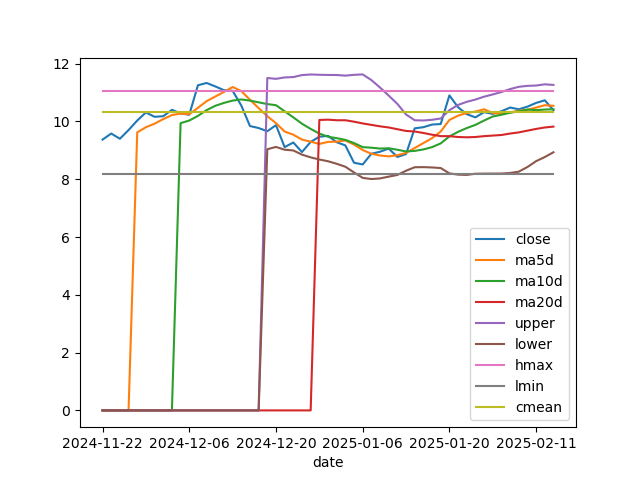

In [70]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [71]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2025-02-13,-1.1,1.3,1.3,0.1,1.2,1.3,0.0,0.2,0.0


In [72]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2025-02-13,-3.2,0.8,1.2,0.9,-0.6,1.3,0.9,-0.6,1.8
